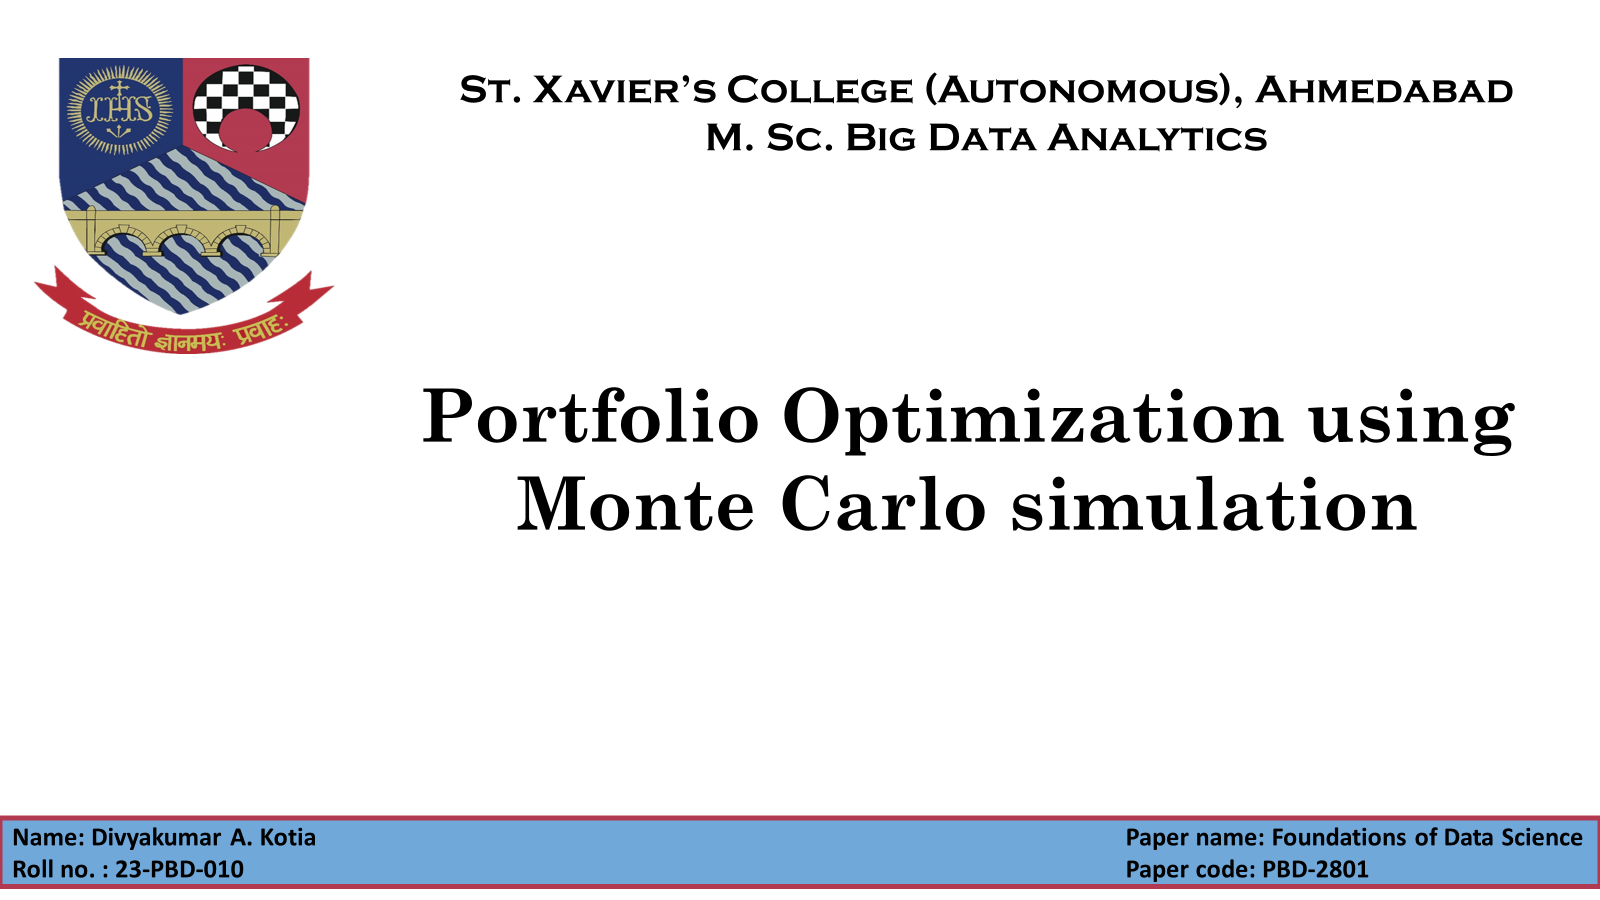

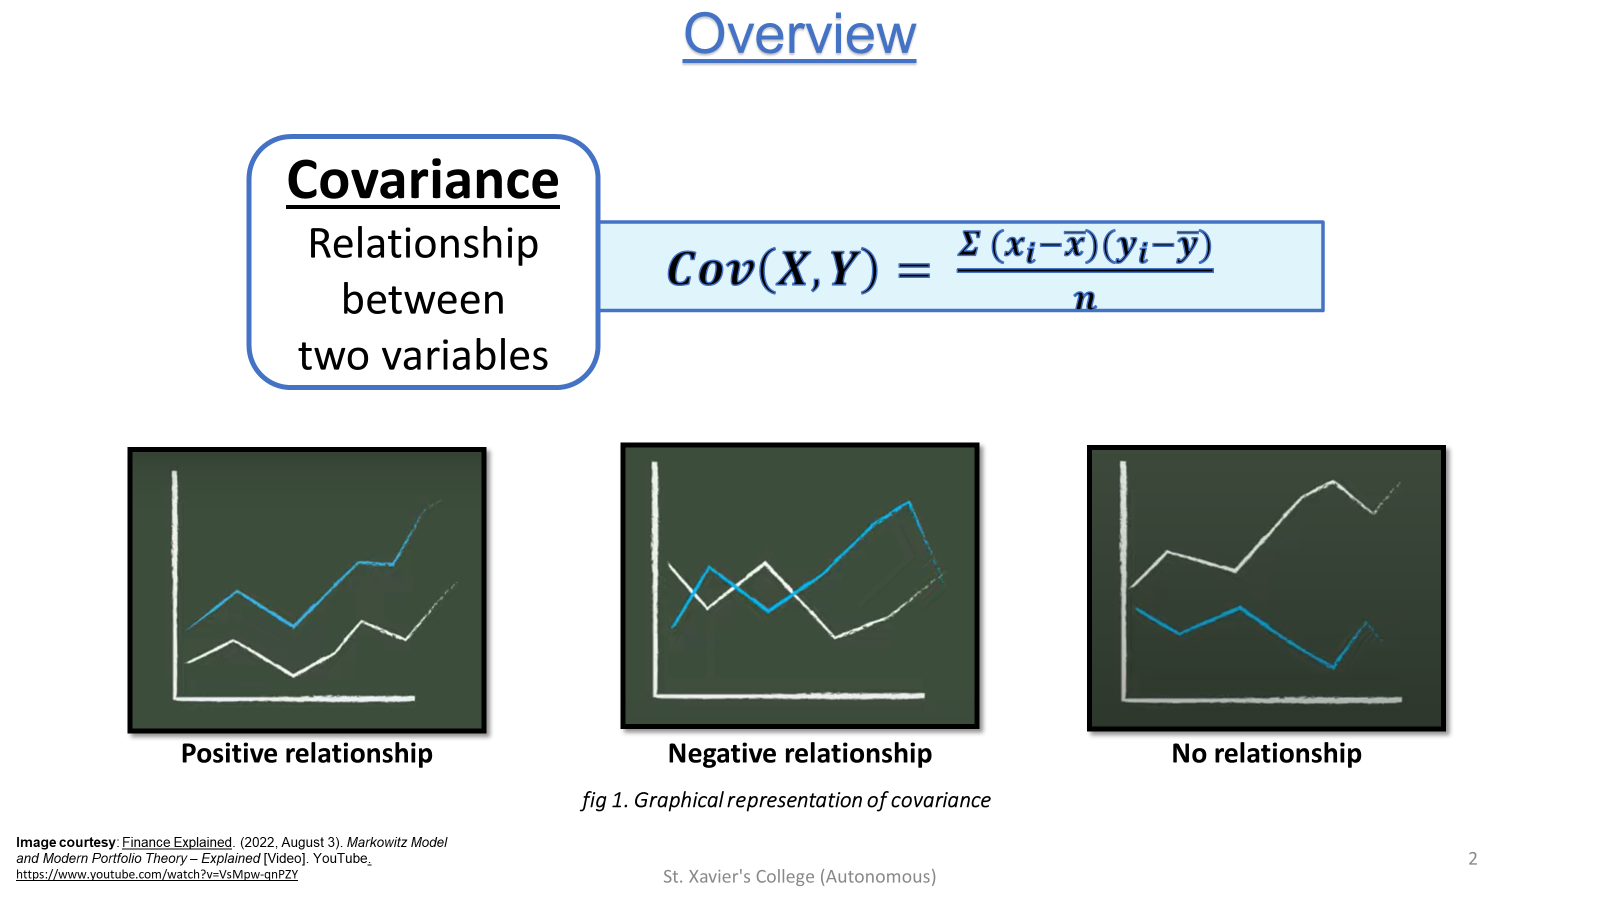

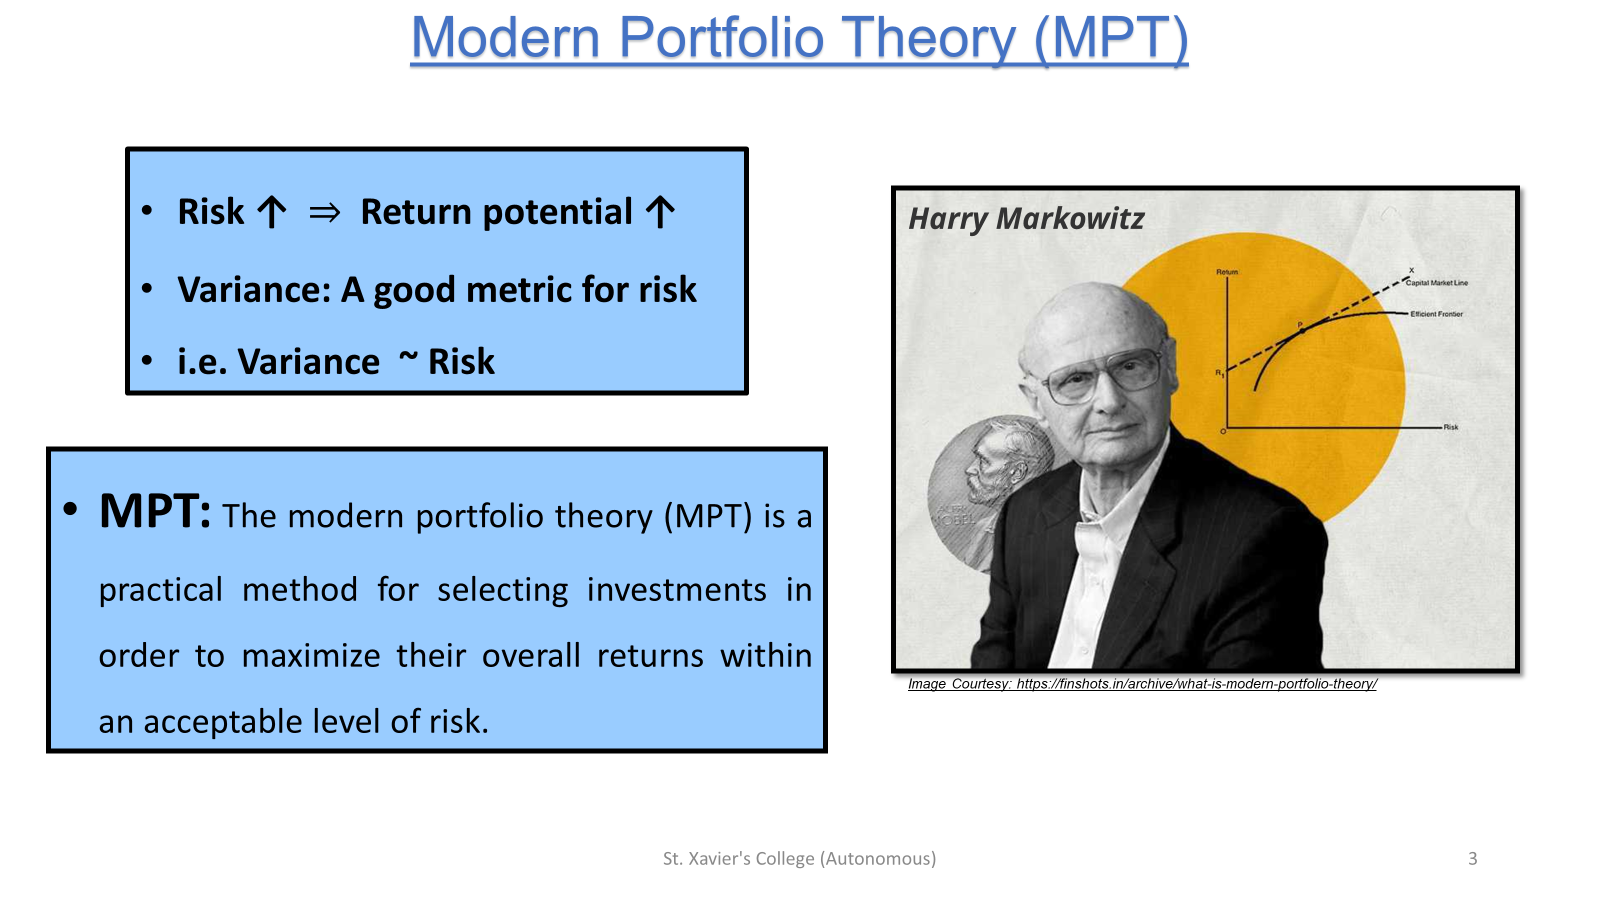

# Effective Portfolio Optimisation using Monte Carlo Simulation

Now we will assess the return and volatility i.e. Annual Mean Return and Annual Standard Deviation by generating various number of portfolio that gives random weights to stocks in the portfolio. And from that we will pick the portfolio that has maximum Sharpe Ratio and is least Volatile.


Here we will use - **1) Reliance Industries
                              2) HDFC Bank
                              3) TCS
                              4) Quant Mid Cap 
                              5) CIPLA**

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#!pip install yfinance

In [3]:
# Define the ticker list
import pandas as pd
tickers_list = ['RELIANCE.NS','HDFCBANK.NS', 'TCS.NS', '0P00005VCH.BO', 'CIPLA.NS']


# Fetch the data
import yfinance as yf
data = yf.download(tickers_list,'2019-1-1')['Adj Close']

data = data[tickers_list]
# Print first 5 rows of the data
print(data)

[*********************100%%**********************]  5 of 5 completed

Ticker      RELIANCE.NS  HDFCBANK.NS       TCS.NS  0P00005VCH.BO     CIPLA.NS
Date                                                                         
2019-01-01  1004.360352  1036.382446  1699.337158      56.880501   509.215546
2019-01-02   991.279419  1026.926025  1717.645386      56.341900   500.940338
2019-01-03   979.049683  1018.868774  1696.791992      55.902599   498.847229
2019-01-04   984.335815  1021.594666  1676.161865      56.575401   499.236603
2019-01-07   989.801086  1023.138489  1694.961304      56.557999   500.453552
...                 ...          ...          ...            ...          ...
2024-03-19  2850.500000  1449.349976  3977.300049     202.047302  1435.699951
2024-03-20  2887.500000  1431.050049  3970.899902     202.765701  1417.400024
2024-03-21  2901.949951  1445.750000  3972.949951     206.758102  1448.699951
2024-03-22  2910.050049  1442.849976  3910.899902     206.913803  1481.250000
2024-03-26  2884.899902  1431.150024  3890.149902            NaN

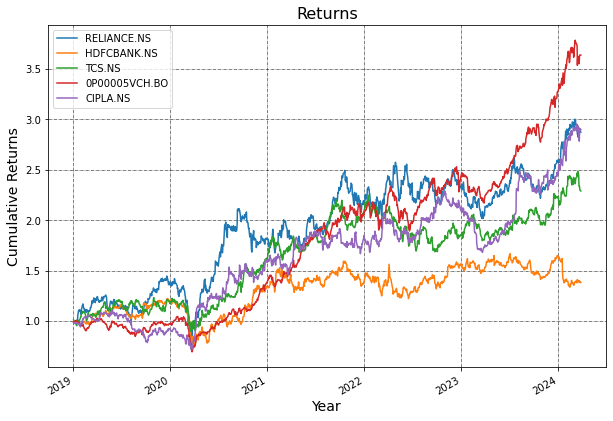

In [4]:
# Plot all the close prices
((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

Now all the prerprocessing is done. Now lets calculate the Portfolio Return and Volatility.<br />
<br />
First I will calculate with equal weight to each stock 

In [5]:
data.describe()

Ticker,RELIANCE.NS,HDFCBANK.NS,TCS.NS,0P00005VCH.BO,CIPLA.NS
count,1293.000000,1293.000000,1293.000000,1287.000000,1293.000000
mean,1930.717066,1354.260320,2812.307509,102.080637,842.538470
std,513.660923,220.949308,692.414739,43.355339,265.438114
min,796.819336,747.039246,1523.792358,39.459900,367.859100
25%,1398.609863,1173.523071,2028.496094,56.827351,581.289978
50%,2051.020264,1410.474854,3041.895508,108.609100,894.594543
75%,2327.056641,1526.300049,3353.816895,131.279152,1012.488403
max,3014.800049,1728.199951,4219.250000,215.270996,1504.099976


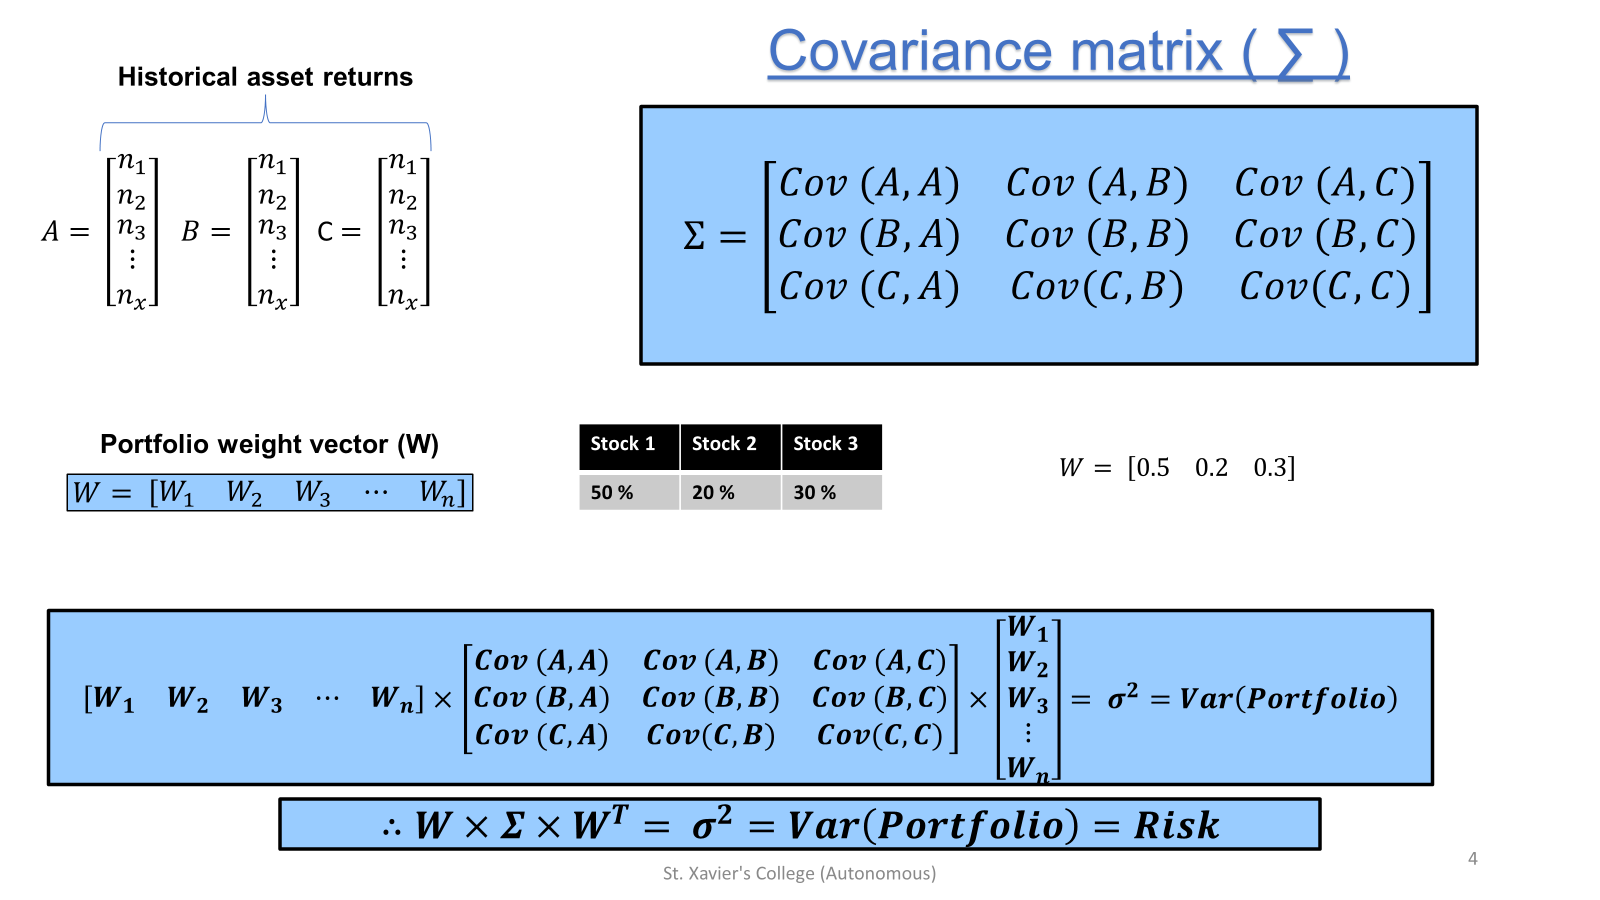

In [6]:
# Calculating log daily returns 
daily_return = np.log(data.pct_change() + 1).dropna()
print(daily_return)

Ticker      RELIANCE.NS  HDFCBANK.NS    TCS.NS  0P00005VCH.BO  CIPLA.NS
Date                                                                   
2019-01-02    -0.013110    -0.009166  0.010716      -0.009514 -0.016384
2019-01-03    -0.012414    -0.007877 -0.012215      -0.007828 -0.004187
2019-01-04     0.005385     0.002672 -0.012233       0.011963  0.000780
2019-01-07     0.005537     0.001510  0.011153      -0.000308  0.002435
2019-01-08    -0.000091    -0.008358 -0.002295       0.006206 -0.000778
...                 ...          ...       ...            ...       ...
2024-03-19    -0.009931     0.002279 -0.043107      -0.018800 -0.036083
2024-03-20     0.012897    -0.012707 -0.001610       0.003549 -0.012828
2024-03-21     0.004992     0.010220  0.000516       0.019498  0.021842
2024-03-22     0.002787    -0.002008 -0.015741       0.000753  0.022220
2024-03-26    -0.008680    -0.008142 -0.005320       0.000000 -0.003855

[1292 rows x 5 columns]


In [7]:
#Now calculating mean of those daily return
daily_return_mean = np.array(daily_return.mean())
print(daily_return_mean*100)

[0.08166713 0.02498004 0.0641029  0.09994967 0.08234634]


In [8]:
#Now assigning weights
#Since there are five stocks so each will have a weight of 0.2 (1/5)
weights = np.array([0.2,0.2,0.2,0.2,0.2])
print(weights)

[0.2 0.2 0.2 0.2 0.2]


In [9]:
# COVARIANCE MATRIX

cov_mat = daily_return.cov()
cov_mat

Ticker,RELIANCE.NS,HDFCBANK.NS,TCS.NS,0P00005VCH.BO,CIPLA.NS
Ticker,,,,,
RELIANCE.NS,0.000359,0.000136,0.000104,0.000122,0.000044
HDFCBANK.NS,0.000136,0.000286,0.000078,0.000100,0.000031
TCS.NS,0.000104,0.000078,0.000243,0.000074,0.000055
0P00005VCH.BO,0.000122,0.000100,0.000074,0.000156,0.000067
CIPLA.NS,0.000044,0.000031,0.000055,0.000067,0.000290


![](https://www.wallstreetmojo.com/wp-content/uploads/2019/04/Portfolio-Return-Formula.jpg)

### Here w is weight and r is return

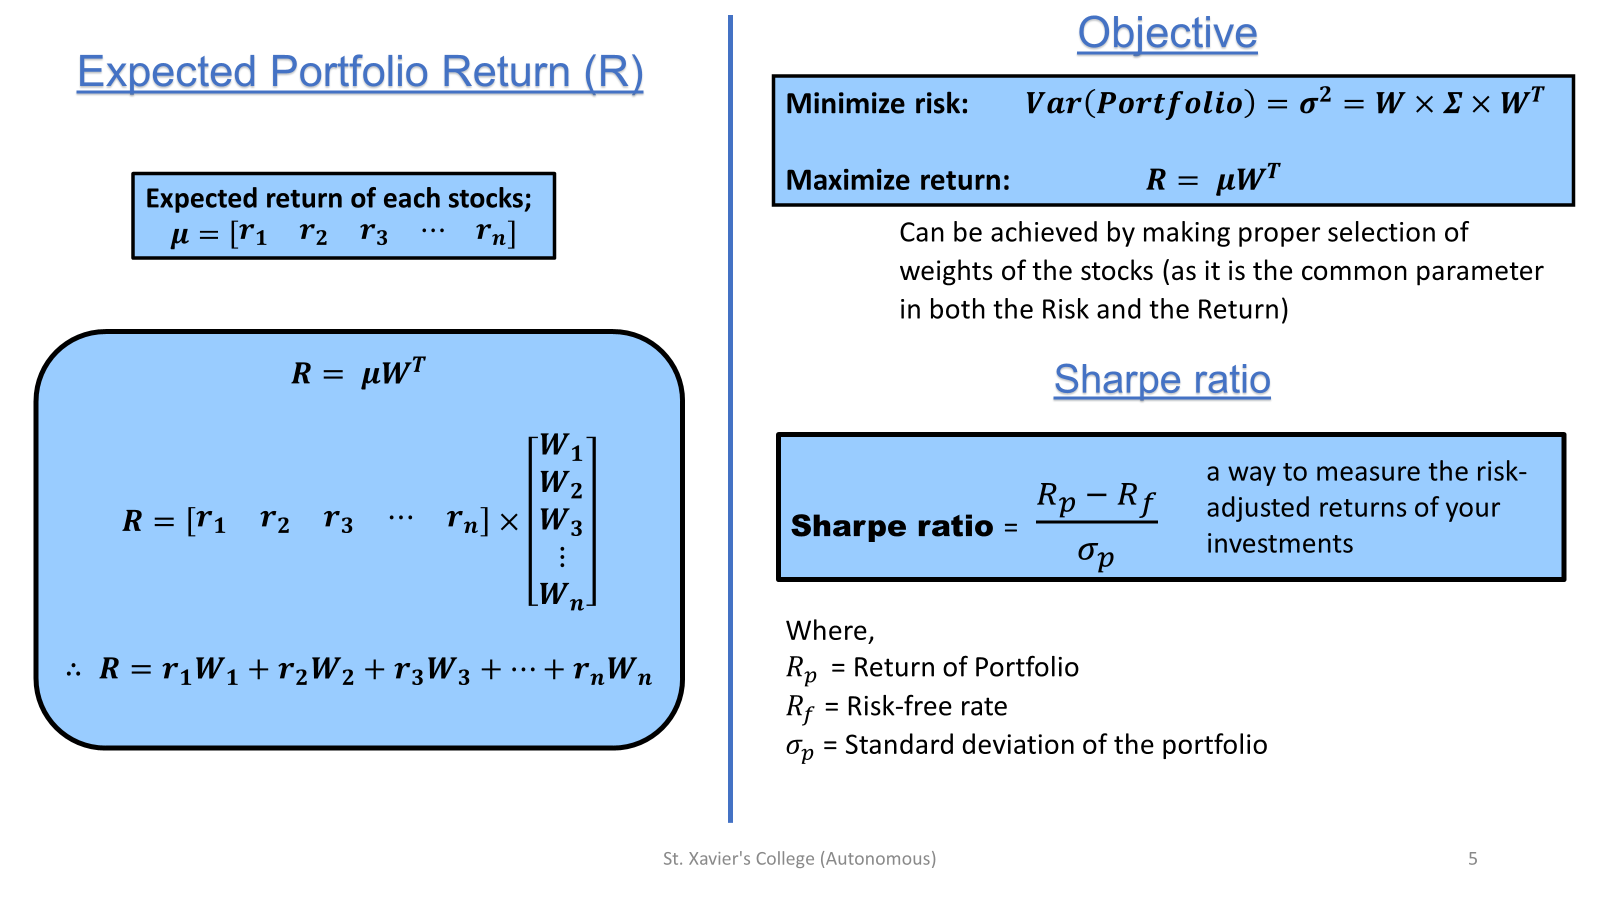

In [10]:
#Calculating Portfolio Return
Port_return = np.sum(weights * daily_return_mean)

print('The Annual Return of Portfolio is {}%'.format((Port_return * 248)*100))
#Here 248 is multiplied for annual calculation i.e. 248 trading days in a year

The Annual Return of Portfolio is 17.51108528878068%


In [11]:
#Calculating Portfolio Volatility
cov = daily_return.cov()

Port_Vol = np.sqrt(weights.T @ cov_mat @ weights)


print('The Annual Volatility of Portfolio is {}%'.format((Port_Vol * np.sqrt(248))*100))

The Annual Volatility of Portfolio is 17.124081058006986%


So far we have seen the Annual Return and Annual Volatility  of Portfolio if equal weight given to each stock.<br />
<br />
Now we will perform the random generation of portfolio i.e. **Monte Carlo Simulation**

In [12]:
#Declare the number of Portfolio to be generated
num_portfolio = 70000

#creating a empty list for storing returns,volatility,sharpe_ratio(return/volatility) and weightage of each stock in portfolio
results = np.zeros((3 + len(daily_return.columns),num_portfolio))


# Risk free rate
Risk_free_rate = 0.07

# Declaring the lower and upper bounds for weights
lower_bound = 0.0
upper_bound = 0.5


#Monte Carlo Simulation
for i in range(num_portfolio):
    
    while True:
    
        weight = np.random.rand(len(daily_return.columns)) #Declaring random weights
        weight = weight/np.sum(weight) #So that sum of all weight will be equal to 1

        if all(lower_bound <= w <= upper_bound for w in weight):
            break
        
        
    p_annual_return = np.sum(weight * daily_return_mean) * 248 #Annual Return
    p_annual_volatility = np.sqrt(np.dot(weight.T,np.dot(cov,weight))) * np.sqrt(248) #Annual Volatility

        #Storing the values in results list
    results[0,i] = p_annual_return
    results[1,i] = p_annual_volatility
    results[2,i] = (results[0,i] - Risk_free_rate)/results[1,i]

    for j in range(len(weight)):
        results[j+3,i] =  weight[j]
        
        
        
#Making a dataframe for results list of all generated Portfolio
cols = ['Ann_Ret','Ann_Vol','Sharpe_Ratio']
for num in range(len(list(daily_return.columns))):
    cols.append(list(daily_return.columns)[num])

    
result_df = pd.DataFrame(results.T,columns=cols)



In [13]:
#Visulising the result dataframe
result_df

,Ann_Ret,Ann_Vol,Sharpe_Ratio,RELIANCE.NS,HDFCBANK.NS,TCS.NS,0P00005VCH.BO,CIPLA.NS
0,0.203873,0.189050,0.708137,0.401306,0.008355,0.184284,0.225781,0.180275
1,0.207546,0.188579,0.729384,0.316235,0.053134,0.172446,0.440286,0.017899
2,0.193058,0.175884,0.699653,0.197292,0.124085,0.064588,0.223263,0.390773
3,0.179007,0.178346,0.611212,0.093035,0.267030,0.162263,0.464453,0.013219
4,0.190444,0.182217,0.660992,0.334995,0.108364,0.096549,0.150600,0.309492
...,...,...,...,...,...,...,...,...
69995,0.177681,0.188590,0.570981,0.346716,0.241059,0.005755,0.197039,0.209430
69996,0.179564,0.168152,0.651581,0.069643,0.141129,0.354812,0.265574,0.168843
69997,0.176252,0.177734,0.597812,0.277868,0.146349,0.210101,0.064766,0.300916
69998,0.152020,0.196840,0.416682,0.377907,0.331480,0.115320,0.018646,0.156647


In [14]:
#locating 
#Portfolio 1 - Sharpe ratio is the highest (Return/Volatility)
#Portfolio 2 - Volatility is the lowest
            

#Portfolio 1
max_sharpe_ratio = result_df.iloc[result_df['Sharpe_Ratio'].idxmax()]

#Portfolio 2
volatility_lowest = result_df.iloc[result_df['Ann_Vol'].idxmin()]

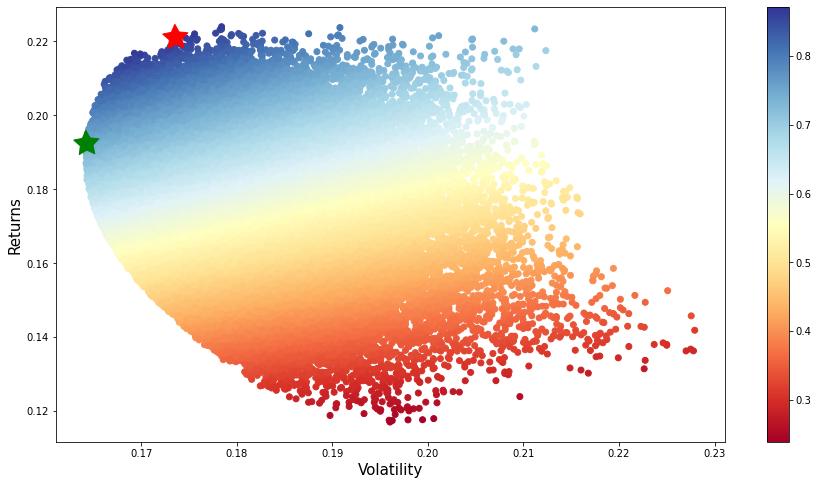

In [15]:
#Plotting the simulation
plt.figure(figsize=(15,8))
plt.scatter(result_df['Ann_Vol'],result_df['Ann_Ret'],c =result_df['Sharpe_Ratio'],cmap='RdYlBu')
plt.colorbar()

plt.scatter(max_sharpe_ratio[1],max_sharpe_ratio[0],marker = (5,1,3),color='red',s=700) #Red - Portfolio 1
plt.scatter(volatility_lowest[1],volatility_lowest[0],marker = (5,1,3),color='green',s=700)#Green - Portfolio 2
            

plt.xlabel('Volatility',fontsize = 15)
plt.ylabel('Returns',fontsize = 15)
plt.show()

   # Conclusion:

In [16]:
print('The Portfolio with maximum Return(or Sharpe_Ratio) is:')
print(round(max_sharpe_ratio,3))

The Portfolio with maximum Return(or Sharpe_Ratio) is:
Ann_Ret          0.221
Ann_Vol          0.174
Sharpe_Ratio     0.872
RELIANCE.NS      0.174
HDFCBANK.NS      0.003
TCS.NS           0.079
0P00005VCH.BO    0.486
CIPLA.NS         0.259
Name: 68338, dtype: float64


In [17]:
print('The Portfolio with least Volatility is:')
print(round(volatility_lowest,3))

The Portfolio with least Volatility is:
Ann_Ret          0.192
Ann_Vol          0.164
Sharpe_Ratio     0.745
RELIANCE.NS      0.015
HDFCBANK.NS      0.139
TCS.NS           0.221
0P00005VCH.BO    0.411
CIPLA.NS         0.214
Name: 32575, dtype: float64
